In [1]:
import os
import pandas as pd
from scipy.stats import norm  
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
root = '/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/overAll/'
accuracy = pd.read_csv(root+"accuracy.csv")
overall = pd.read_csv(root+"Overall.csv")
overall = overall[~overall['opalTime'].isna()]
input_data = pd.read_csv(root+"inputStats.csv")

In [5]:
def mean_median_std(data, field):
    print("mean of %s: %f" %( field, data[field].mean()))
    print("std of %s: %f" %( field, data[field].std()))
    print("median of %s: %f" %( field, data[field].median()))
    print('\n')
    
def violin(data, field, path):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1)
    ax1.violinplot(data[field], showmedians=True)
    ax1.set_title(field)
    plt.savefig(path)
    plt.show()
    plt.close()
    
def cumulative_curve(data, field):
    plt.title(field)
    X2 = np.sort(data[field])/float(1000)
    F2 = np.array(range(len(data[field])))
    plt.plot(X2, F2)
    plt.ticklabel_format(useOffset=False)
    plt.show()
    plt.close()
    
def remove_outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    new_df = df[filtered_entries]
    return new_df

In [8]:
print("####### Accuracy Comparison ####### \n ")
mean_median_std(accuracy, 'precision')
mean_median_std(accuracy, 'recall')
mean_median_std(accuracy, 'OPAL')
mean_median_std(accuracy, 'Merge')
mean_median_std(accuracy, 'intersection')

df = pd.DataFrame(dict(mean=[accuracy['precision'].mean(), accuracy['recall'].mean()],
                  std=[accuracy['precision'].std(), accuracy['recall'].std()],
                  median=[accuracy['precision'].median(), accuracy['recall'].median()]))

print(df.to_latex(index = True, index_names= True))


overall_fair = overall[(overall['mergeEdges'] != -1) & (overall['opalEdges'] != -1)]

print("####### Edge Comparison ####### \n ")
mean_median_std(overall_fair, 'mergeEdges')
mean_median_std(overall_fair, 'opalEdges')

print("merge edges: %d" %(overall_fair['mergeEdges'].sum()))
print("opal edges: %d" %(overall_fair['mergeEdges'].sum()))

print("####### Time Comparison ####### \n ")
df = pd.DataFrame(dict(mean=[overall_fair['mergeTime'].mean(), overall_fair['opalTime'].mean(), overall_fair['cgPool'].mean()],
                  std=[overall_fair['mergeTime'].std(), overall_fair['opalTime'].std(), overall_fair['cgPool'].std()],
                  median=[overall_fair['mergeTime'].median(), overall_fair['opalTime'].median(), overall_fair['cgPool'].median()]))

print(df.to_latex(index = True, index_names= True))

mean_median_std(overall_fair, 'mergeTime')
mean_median_std(overall_fair, 'UCHTime')
mean_median_std(overall_fair, 'opalTime')

####### Accuracy Comparison ####### 
 
mean of precision: 0.986204
std of precision: 0.096140
median of precision: 1.000000


mean of recall: 0.660008
std of recall: 0.400864
median of recall: 0.909091


mean of OPAL: 20.690897
std of OPAL: 80.660564
median of OPAL: 2.000000


mean of Merge: 12.377574
std of Merge: 59.996623
median of Merge: 1.000000


mean of intersection: 12.015537
std of intersection: 58.936274
median of intersection: 1.000000


\begin{tabular}{lrrr}
\toprule
{} &      mean &       std &    median \\
\midrule
0 &  0.986204 &  0.096140 &  1.000000 \\
1 &  0.660008 &  0.400864 &  0.909091 \\
\bottomrule
\end{tabular}

####### Edge Comparison ####### 
 
mean of mergeEdges: 766118.600000
std of mergeEdges: 46090.244866
median of mergeEdges: 748612.000000


mean of opalEdges: 1304553.000000
std of opalEdges: 87078.914839
median of opalEdges: 1266028.000000


merge edges: 3830593
opal edges: 3830593
####### Time Comparison ####### 
 
\begin{tabular}{lrrr}
\toprule
{} &   

####### Accuracy Comparison ####### 
 


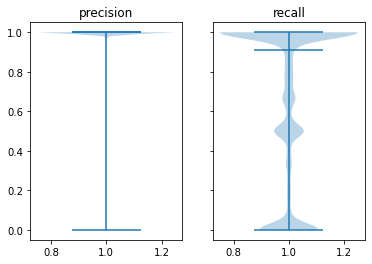

####### Edge Comparison ####### 
 


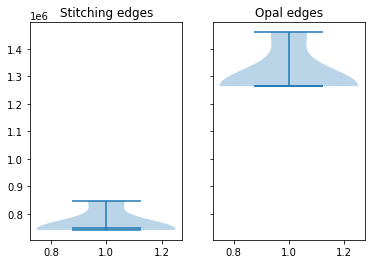

####### Time Comparison ####### 
 


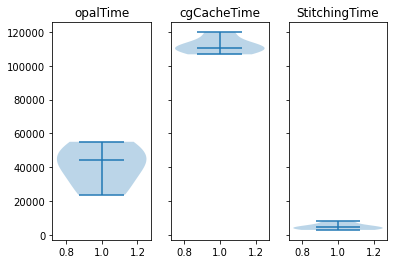

In [16]:
directory = "figure"
if not os.path.exists(directory):
    os.mkdir(directory)

print("####### Accuracy Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1[0].violinplot(accuracy['precision'], showmedians=True)
ax1[1].violinplot(accuracy['recall'], showmedians=True)
ax1[0].set_title('precision')
ax1[1].set_title('recall')
plt.savefig(directory+'/precisonRecall.pdf')
plt.show()
plt.close()


print("####### Edge Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1[0].violinplot(overall_fair['mergeEdges'], showmedians=True)
ax1[1].violinplot(overall_fair['opalEdges'], showmedians=True)
ax1[0].set_title('Stitching edges')
ax1[1].set_title('Opal edges')
plt.savefig(directory+'/edgeComparison.pdf')
plt.show()
plt.close()

print("####### Time Comparison ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=True)
ax1[0].violinplot(overall_fair['opalTime'], showmedians=True)
ax1[1].violinplot(overall_fair['cgPool'], showmedians=True)
ax1[2].violinplot(overall_fair['mergeTime'], showmedians=True)
ax1[0].set_title('opalTime')
ax1[1].set_title('cgCacheTime')
ax1[2].set_title('StitchingTime')
plt.savefig(directory+'/timeViolin.pdf')
plt.show()
plt.close()



####### Input Data ####### 
 


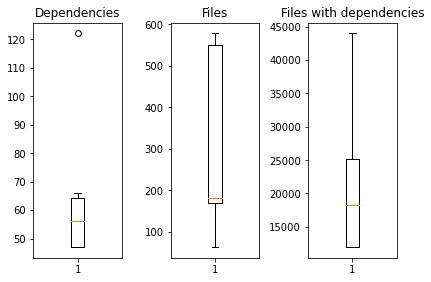

In [36]:
print("####### Input Data ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=False)
ax1[0].boxplot(remove_outliers(input_data['depNum']))
ax1[0].set_title('Dependencies')
ax1[1].boxplot(remove_outliers(input_data['numFiles']))
ax1[1].set_title('Files')
ax1[2].boxplot(remove_outliers(input_data['numFilesWithDeps']))
ax1[2].set_title('Files with dependencies')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

In [32]:
input_data['numFilesWithDeps']

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

In [38]:
new = input_data['numFilesWithDeps'][0:2]
cond = input_data['numFilesWithDeps'].isin(new)
df1 = input_data['numFilesWithDeps']
df2 = df1.drop(df1[cond].index)
df2


4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

In [39]:
new

0    24475
1    11956
Name: numFilesWithDeps, dtype: int64

In [18]:
print("depNum: %s"%input_data['depNum'].mean())
print("numFiles: %s"%input_data['numFiles'].mean())
print("numFilesWithDeps: %s"%input_data['numFilesWithDeps'].mean())

depNum: 61.5
numFiles: 316.3
numFilesWithDeps: 20625.2


In [40]:
df1

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

####### Accuracy Comparison ####### 
 


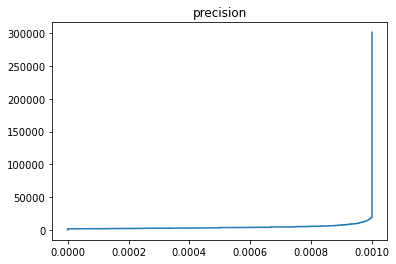

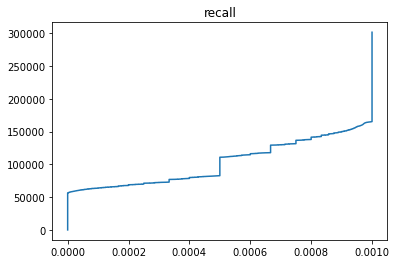

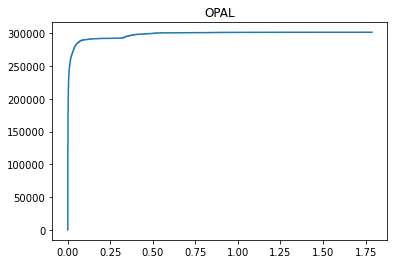

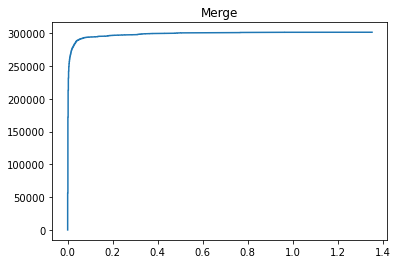

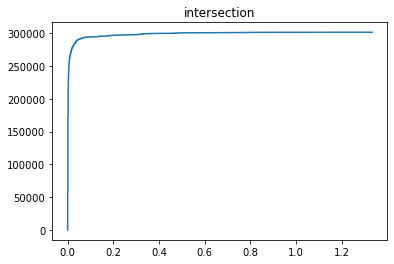

In [19]:
print("####### Accuracy Comparison ####### \n ")
cumulative_curve(accuracy, 'precision')
cumulative_curve(accuracy, 'recall')
cumulative_curve(accuracy, 'OPAL')
cumulative_curve(accuracy, 'Merge')
cumulative_curve(accuracy, 'intersection')